## I. Introduction

The dataset that I have chosen for this weeks analysis is from Kaggle and is a dataset of self reported stipend earnings for PhD students. I chose this dataset as I wanted to investigate further on what the financial implications of further pursuing my education after this Master's program would have on my family. I also specifically chose this dataset because it was not particularly clean and I wanted to futher work on data preparation for this exploratory data analysis assignment.

## II. Methods/Code, III. Results/Output, IV. Analysis of Results

### Setup
---

The process for getting our analysis setup will be to setup our plots to inline, import the necessary python packages, look over our csv, and import the csv into a dataframe.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import phik
from scipy import svd

In [2]:
!head phd.csv

In [3]:
phd_df = pd.read_csv('phd.csv')
phd_df

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,"$34,000",NaN,NaN,NaN,NaN
1,University of Texas - Austin (UT),Material Science & Engineering,"$26,990",1.18,2022-2023,1st,"$27,000",NaN,NaN,$10,NaN
2,Stony Brook University - SUNY,NaN,"$33,000",1.18,2022-2023,1st,NaN,"$33,000",NaN,NaN,"22,500 base + 5500 Graduate Council Fellowship..."
3,University of California - Merced,Cognitive and Information Sciences,"$2,000",0.10,2022-2023,1st,NaN,"$2,000",NaN,NaN,NaN
4,New York University (NYU),Social Work,"$-40,000",-1.35,2022-2023,1st,"$10,000",NaN,NaN,"$50,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
12276,Duke University (DU),Biochemistry,"$29,840",1.59,2012-2013,6th and up,"$29,840",NaN,NaN,NaN,NaN
12277,University of Virginia (UVA),Chemical Engineering,"$32,000",1.63,2013-2014,4th,"$32,000",NaN,NaN,NaN,"This includes health insurance coverage, tuiti..."
12278,Duke University (DU),Biomedical Engineering,"$32,000",1.70,2013-2014,2nd,"$32,000",NaN,NaN,NaN,This is the stipend associated with the NSF Fe...
12279,University of Virginia (UVA),Chemical Engineering,"$25,000",1.28,2013-2014,4th,"$25,000",NaN,NaN,NaN,This stipend includes full health insurance co...


<section id='missing'></section>

### Handle Missing Values
***

In [4]:
# show using my preferred method (isna/isnull) and showing only the relevant data (column)

phd_df.isnull().sum()

University          406
Department          600
Overall Pay          46
LW Ratio           1287
Academic Year         5
Program Year       1413
12 M Gross Pay     3528
9 M Gross Pay      8789
3 M Gross Pay     11132
Fees               7479
Comments           9242
dtype: int64

In [5]:
phd_df[phd_df['University'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
8,NaN,department of mathematics and statistics,"$1,800",NaN,2020-2021,1st,"$2,600",NaN,NaN,$800,NaN
26,NaN,Educational Psychology,"$15,500",NaN,2021-2022,1st,"$20,000",NaN,NaN,"$4,500",NaN
31,NaN,NaN,"$18,000",NaN,2020-2021,NaN,NaN,"$18,000",NaN,NaN,NaN


In [6]:
phd_df[phd_df['Department'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
2,Stony Brook University - SUNY,NaN,"$33,000",1.18,2022-2023,1st,NaN,"$33,000",NaN,NaN,"22,500 base + 5500 Graduate Council Fellowship..."
13,Arizona State University (ASU),NaN,"$18,714",0.84,2021-2022,1st,NaN,"$19,158",NaN,$444,NaN
30,St. Louis University (SLU),NaN,"$18,000",0.87,2020-2021,NaN,NaN,"$18,000",NaN,NaN,NaN


In [7]:
phd_df[phd_df['Overall Pay'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
784,Duke University (DU),psychology and neuroscience,NaN,0.0,2021-2022,1st,"$3,000",NaN,NaN,"$3,000",NaN
1356,Purdue University - West Lafayette,ECE,NaN,0.0,2020-2021,2nd,"$111,111",NaN,NaN,"$111,111",NaN
1443,Indiana University,COMP,NaN,0.0,2020-2021,3rd,"$2,000",NaN,NaN,"$2,000",NaN


In [8]:
phd_df[phd_df['LW Ratio'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
8,NaN,department of mathematics and statistics,"$1,800",NaN,2020-2021,1st,"$2,600",NaN,NaN,$800,NaN
9,"University at Albany, State University of New ...",department of mathematics and statistics,"$1,800",NaN,2020-2021,1st,"$2,600",NaN,NaN,$800,NaN
26,NaN,Educational Psychology,"$15,500",NaN,2021-2022,1st,"$20,000",NaN,NaN,"$4,500",NaN


In [9]:
phd_df[phd_df['Academic Year'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
2152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,University of Utah,business,"$220,000",11.21,NaN,NaN,"$220,000",NaN,NaN,NaN,NaN


In [10]:
phd_df[phd_df['Program Year'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
17,University of Arizona (U of A),Sociology,"$19,683",0.95,2021-2022,NaN,"$20,500",NaN,NaN,$817,International Student.
30,St. Louis University (SLU),NaN,"$18,000",0.87,2020-2021,NaN,NaN,"$18,000",NaN,NaN,NaN
31,NaN,NaN,"$18,000",NaN,2020-2021,NaN,NaN,"$18,000",NaN,NaN,NaN


In [11]:
phd_df[phd_df['12 M Gross Pay'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
2,Stony Brook University - SUNY,NaN,"$33,000",1.18,2022-2023,1st,NaN,"$33,000",NaN,NaN,"22,500 base + 5500 Graduate Council Fellowship..."
3,University of California - Merced,Cognitive and Information Sciences,"$2,000",0.10,2022-2023,1st,NaN,"$2,000",NaN,NaN,NaN
5,University of Minnesota - Twin Cities (UM),Psychology,"$23,500",1.03,2020-2021,6th and up,NaN,"$19,500","$5,000","$1,000","For newer cohorts, summer funding is now guara..."


In [12]:
phd_df[phd_df['9 M Gross Pay'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,"$34,000",NaN,NaN,NaN,NaN
1,University of Texas - Austin (UT),Material Science & Engineering,"$26,990",1.18,2022-2023,1st,"$27,000",NaN,NaN,$10,NaN
4,New York University (NYU),Social Work,"$-40,000",-1.35,2022-2023,1st,"$10,000",NaN,NaN,"$50,000",NaN


In [13]:
phd_df[phd_df['3 M Gross Pay'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,"$34,000",NaN,NaN,NaN,NaN
1,University of Texas - Austin (UT),Material Science & Engineering,"$26,990",1.18,2022-2023,1st,"$27,000",NaN,NaN,$10,NaN
2,Stony Brook University - SUNY,NaN,"$33,000",1.18,2022-2023,1st,NaN,"$33,000",NaN,NaN,"22,500 base + 5500 Graduate Council Fellowship..."


In [14]:
phd_df[phd_df['Fees'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,"$34,000",NaN,NaN,NaN,NaN
2,Stony Brook University - SUNY,NaN,"$33,000",1.18,2022-2023,1st,NaN,"$33,000",NaN,NaN,"22,500 base + 5500 Graduate Council Fellowship..."
3,University of California - Merced,Cognitive and Information Sciences,"$2,000",0.10,2022-2023,1st,NaN,"$2,000",NaN,NaN,NaN


In [15]:
phd_df[phd_df['Comments'].isna()].head(3)

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,"$34,000",NaN,NaN,NaN,NaN
1,University of Texas - Austin (UT),Material Science & Engineering,"$26,990",1.18,2022-2023,1st,"$27,000",NaN,NaN,$10,NaN
3,University of California - Merced,Cognitive and Information Sciences,"$2,000",0.10,2022-2023,1st,NaN,"$2,000",NaN,NaN,NaN


Observations from where our N/A's exist in the data we can make a few decisions about the dataset. The first is that there are a few entries that are entirely N/A, which can be excluded from the dataset. Next is that our overall pay, 12m, 9m, and 3m, and fees are related and overall can be built from the other columns if it is missing. Missing university enries should be excluded as they do not provide an observation that is assignable to a meaningful bucket without some better understanding of the source data. There also does not appear to be a calculation from the columns provided for the LW Ratio, so where that is missing we should drop the corresponding observations.  Lastly, we have comments which although providing clarifying details, or could illuminate errors in the data entry are not useful without implementing some NLP, or going through them by hand, so the details there will be excluded from this analysis.

In [16]:
# Drop observations where the LW Ratio, or University is N/A

phd_df.dropna(axis=0, subset=['University','LW Ratio'], inplace=True)

Next we are going to fill the NA's for Overall Pay, Gross Pay, and Fees with zero to be fixed in new columns later on in our analysis.

In [17]:
# Fill missing observations in Overall Pay, Gross Pay, and Fees
values = {'Overall Pay': '0', '12 M Gross Pay': '0', '9 M Gross Pay': '0', '3 M Gross Pay': '0', 'Fees': '0'}
phd_df.fillna(value=values, inplace=True)

In [18]:
phd_df.isnull().sum()

University           0
Department         348
Overall Pay          0
LW Ratio             0
Academic Year        3
Program Year      1130
12 M Gross Pay       0
9 M Gross Pay        0
3 M Gross Pay        0
Fees                 0
Comments          8270
dtype: int64

From here we will be filling the N/A's for Department, Academic Year, and Program Year, which we will fill with Unknown for now. With our comments, since we will not be trying to get insights from it right now we will drop that column from our dataframe.

In [19]:
# Fill missing observations for Department, Program Year, and Academic Year
values = {'Department': 'Unknown', 'Academic Year': 'Unknown', 'Program Year': 'Unknown'}
phd_df.fillna(value=values, inplace=True)

In [20]:
phd_df.drop(labels=['Comments'], axis=1, inplace=True)

In [21]:
phd_df.isnull().sum()

University        0
Department        0
Overall Pay       0
LW Ratio          0
Academic Year     0
Program Year      0
12 M Gross Pay    0
9 M Gross Pay     0
3 M Gross Pay     0
Fees              0
dtype: int64

### Question 1: Describe the data within the dataset

---

- **Data types: Categorical vs. Continuous variables.**

The general approach to looking at our categorical vs. continuous variables is by running the info function on our dataframe and seeing which columns are objects, integers, and floats.

In [22]:
phd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10994 entries, 0 to 12280
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   University      10994 non-null  object 
 1   Department      10994 non-null  object 
 2   Overall Pay     10994 non-null  object 
 3   LW Ratio        10994 non-null  float64
 4   Academic Year   10994 non-null  object 
 5   Program Year    10994 non-null  object 
 6   12 M Gross Pay  10994 non-null  object 
 7   9 M Gross Pay   10994 non-null  object 
 8   3 M Gross Pay   10994 non-null  object 
 9   Fees            10994 non-null  object 
dtypes: float64(1), object(9)
memory usage: 944.8+ KB


The results of our info method are not what you would initially expect. It looks like the column overall pay is of type object and we would expect it to probably be continuous unless they are bucketed into discrete categories. Running the value counts on this column should help us understand why this column is an object. We will also see if our null values are causing an issue on the types for these columns.

In [23]:
phd_df['Overall Pay'].value_counts()

$30,000     383
$24,000     270
$25,000     255
$34,000     250
$32,000     216
           ... 
$24,450       1
$-23,100      1
$20,682       1
$24,064       1
$29,840       1
Name: Overall Pay, Length: 3207, dtype: int64

It looks like the columns: Overall Pay, 12 M Gross Pay, 9 M Gross Pay, 3 M Gross Pay, and Fees will all need their missing values resolved. I am linking to the details of that work to this section for clarity.

In [24]:
# Looking at an example entry

phd_df['Overall Pay'].iloc[0]

'$34,000'

In [25]:
# Looking to convert the type of Overall Pay to an integer or float for analysis

int(phd_df['Overall Pay'].iloc[0].replace('$','').replace(',', ''))

34000

In [26]:
phd_df['overall_pay_clean'] =  phd_df['Overall Pay'].str.replace('$','', regex=False).str.replace(',','',regex=False)
phd_df['overall_pay_clean'] = pd.to_numeric(phd_df['overall_pay_clean'])
phd_df['overall_pay_clean'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10994 entries, 0 to 12280
Series name: overall_pay_clean
Non-Null Count  Dtype
--------------  -----
10994 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


In [27]:
phd_df['12_gross_pay_clean'] =  phd_df['12 M Gross Pay'].str.replace('$','', regex=False).str.replace(',','',regex=False)
phd_df['12_gross_pay_clean'] = pd.to_numeric(phd_df['12_gross_pay_clean'])
phd_df['12_gross_pay_clean'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10994 entries, 0 to 12280
Series name: 12_gross_pay_clean
Non-Null Count  Dtype
--------------  -----
10994 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


In [28]:
phd_df['9_gross_pay_clean'] =  phd_df['9 M Gross Pay'].str.replace('$','', regex=False).str.replace(',','',regex=False)
phd_df['9_gross_pay_clean'] = pd.to_numeric(phd_df['9_gross_pay_clean'])
phd_df['9_gross_pay_clean'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10994 entries, 0 to 12280
Series name: 9_gross_pay_clean
Non-Null Count  Dtype
--------------  -----
10994 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


In [29]:
phd_df['3_gross_pay_clean'] =  phd_df['3 M Gross Pay'].str.replace('$','', regex=False).str.replace(',','',regex=False)
phd_df['3_gross_pay_clean'] = pd.to_numeric(phd_df['3_gross_pay_clean'])
phd_df['3_gross_pay_clean'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10994 entries, 0 to 12280
Series name: 3_gross_pay_clean
Non-Null Count  Dtype
--------------  -----
10994 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


In [30]:
phd_df['fees_clean'] =  phd_df['Fees'].str.replace('$','', regex=False).str.replace(',','',regex=False)
phd_df['fees_clean'] = pd.to_numeric(phd_df['fees_clean'])
phd_df['fees_clean'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10994 entries, 0 to 12280
Series name: fees_clean
Non-Null Count  Dtype
--------------  -----
10994 non-null  int64
dtypes: int64(1)
memory usage: 171.8 KB


In [31]:
phd_df.shape

(10994, 15)

In [32]:
phd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10994 entries, 0 to 12280
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   University          10994 non-null  object 
 1   Department          10994 non-null  object 
 2   Overall Pay         10994 non-null  object 
 3   LW Ratio            10994 non-null  float64
 4   Academic Year       10994 non-null  object 
 5   Program Year        10994 non-null  object 
 6   12 M Gross Pay      10994 non-null  object 
 7   9 M Gross Pay       10994 non-null  object 
 8   3 M Gross Pay       10994 non-null  object 
 9   Fees                10994 non-null  object 
 10  overall_pay_clean   10994 non-null  int64  
 11  12_gross_pay_clean  10994 non-null  int64  
 12  9_gross_pay_clean   10994 non-null  int64  
 13  3_gross_pay_clean   10994 non-null  int64  
 14  fees_clean          10994 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.3+

In [33]:
phd_df.describe()

,LW Ratio,overall_pay_clean,12_gross_pay_clean,9_gross_pay_clean,3_gross_pay_clean,fees_clean
count,10994.000000,1.099400e+04,1.099400e+04,10994.000000,10994.000000,10994.000000
mean,1.124946,2.658666e+04,2.117965e+04,5934.366382,512.196016,1039.548299
std,2.644225,6.976018e+04,7.018304e+04,10214.964363,1878.802300,10524.909116
min,-34.010000,-9.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,0.870000,2.000000e+04,0.000000e+00,0.000000,0.000000,0.000000
50%,1.120000,2.600000e+04,2.500000e+04,0.000000,0.000000,0.000000
75%,1.320000,3.138375e+04,3.100000e+04,14652.750000,0.000000,700.000000
max,262.320000,6.942069e+06,6.942069e+06,189600.000000,55816.000000,1000000.000000


Unfortunately we are not done yet with these values. The overall_pay_clean value still needs correction, or verification, where it is zero. For this we will see if our gross pay values are all zero and fees is zero to verify the zero value overall pay. Otherwise we will take (in this priority order) the 12 month pay if not zero, the 9 month pay if not zero, the 3 month pay if not zero, or zero minus the fees as the overall pay.

In [34]:
phd_df[phd_df['overall_pay_clean'] != phd_df['12_gross_pay_clean'] + phd_df['9_gross_pay_clean'] 
       + phd_df['3_gross_pay_clean'] - phd_df['fees_clean']]

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,overall_pay_clean,12_gross_pay_clean,9_gross_pay_clean,3_gross_pay_clean,fees_clean


Looks like that was already accounted for in the dataset, so we are actually good to move on to the statisticall summary of our dataset. I am going to remove the Gross Pay columns and the Fees columns in order to keep the analysis concise. Thinking longer term here we are going to want to look at how the LW Ratio and Overall Pay vary by department and university, so we will likely be enriching the data to get some comparisons to any enhancements we make to those categorical columns.

In [35]:
phd_df.drop(columns=['12 M Gross Pay', '12_gross_pay_clean',
                    '9 M Gross Pay', '9_gross_pay_clean',
                    '3 M Gross Pay', '3_gross_pay_clean',
                    'Fees', 'fees_clean'], inplace=True)

The dataset has two columns (after cleaning) that are continuous LW Ratio and Overall Pay. The dataset also has 4 categorical columns University, Department, Academic Year, and Program Year.

- **Statistical summary, etc.**

In [36]:
phd_df['University'].value_counts()

Duke University (DU)                                    204
University of Wisconsin - Madison (UW)                  200
University of California - Berkeley                     194
University of California - San Diego (UCSD)             194
University of North Carolina - Chapel Hill (UNC)        193
                                                       ... 
CUNY - Brooklyn College                                   1
Rosalind Franklin University of Medicine and Science      1
University of the Pacific (UOP)                           1
Tennessee Technological University                        1
Pacifica Graduate Institute                               1
Name: University, Length: 291, dtype: int64

In [37]:
phd_df['Department'].value_counts()

Chemistry                     440
Unknown                       348
Psychology                    303
Sociology                     267
English                       252
                             ... 
MEAM/GRASP                      1
ME                              1
Medical genetics                1
Cell and Molecular biology      1
aerospace engineering           1
Name: Department, Length: 2965, dtype: int64

In [38]:
phd_df['Academic Year'].value_counts()

2020-2021    2530
2016-2017    1968
2018-2019    1689
2019-2020    1314
2017-2018    1113
2021-2022     935
2014-2015     520
2015-2016     393
2022-2023     268
2013-2014      95
2012-2013      40
2011-2012      39
2010-2011      26
2007-2008      15
2009-2010      14
2006-2007      11
2008-2009       6
2002-2003       5
2003-2004       4
2004-2005       3
2005-2006       3
Unknown         3
Name: Academic Year, dtype: int64

In [39]:
phd_df['Program Year'].value_counts()

1st           5575
2nd           1369
Unknown       1130
3rd           1047
4th            851
5th            681
6th and up     341
Name: Program Year, dtype: int64

In [40]:
phd_df.describe()

,LW Ratio,overall_pay_clean
count,10994.000000,1.099400e+04
mean,1.124946,2.658666e+04
std,2.644225,6.976018e+04
min,-34.010000,-9.000000e+05
25%,0.870000,2.000000e+04
50%,1.120000,2.600000e+04
75%,1.320000,3.138375e+04
max,262.320000,6.942069e+06


In [41]:
# Looking at the max and mins for our continuous columns to see what these ranges look like.

max(phd_df['overall_pay_clean'])

6942069

In [42]:
min(phd_df['overall_pay_clean'])

-900000

In [43]:
max(phd_df['LW Ratio'])

262.32

In [44]:
min(phd_df['LW Ratio'])

-34.01

It looks like we have outlier problems with these datasets. This is expected due to the self reported nature of the dataset and the lack of validation on many of the columns. We will need to re-test our summary statistics after we have determined what to do with the outliers.

### Question 2: Data Cleaning

---

- **Identify and handle missing values**

Our dataset's number of missing values necessitated our handling of the missing values before this point. You can see the step by step and output in Question 1 and I will provide a link to the associated section [here](#missing).

- **Identify and handle outliers**

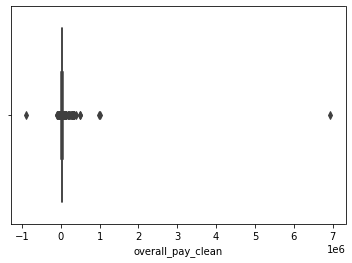

In [45]:
# Starting with looking at a graph so we can see what the distribution of data is looking like with outliers.

ax = sns.boxplot(x=phd_df['overall_pay_clean'])

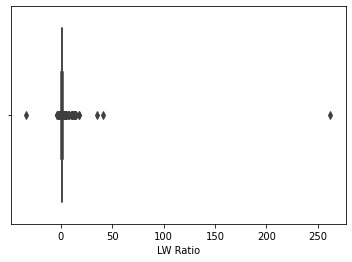

In [46]:
ax = sns.boxplot(x=phd_df['LW Ratio'])

Okay, it looks like we have some extreme outliers here. This is not very surprising as this is self reported data and some of it is likely to be a entered jokingly, or exaggerated. From here I think we can safely drop the observations that fall outside of three standard deviations of the mean without concern of losing the meaningful information.

In [47]:
# Method adapted from stackoverflow: (https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)

high = phd_df['overall_pay_clean'].quantile(0.99)
low = phd_df['overall_pay_clean'].quantile(0.01)

phd_df = phd_df[(phd_df['overall_pay_clean'] < high) & (phd_df['overall_pay_clean'] > low)]

In [48]:
high = phd_df['LW Ratio'].quantile(0.99)
low = phd_df['LW Ratio'].quantile(0.01)

phd_df = phd_df[(phd_df['LW Ratio'] < high) & (phd_df['LW Ratio'] > low)]

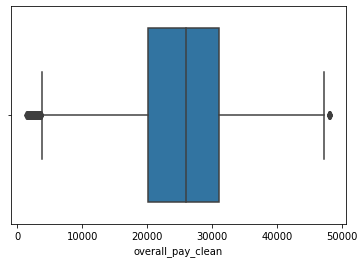

In [49]:
ax = sns.boxplot(x=phd_df['overall_pay_clean'])

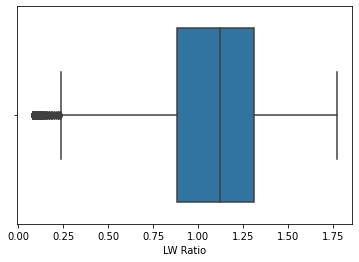

In [50]:
ax = sns.boxplot(x=phd_df['LW Ratio'])

In [51]:
phd_df.shape

(10533, 7)

This cleans up our most relavant continuous feature, and the result makes sense. Our PhD stipends total pay after fees is between zero and 50k, with the central tendency being between 20k-30k. Outliers for the other features are not going to be as meaningful, since fees could be interpreted a lot of ways and might just be viewed as the tuition waived by the program.

### Question 3: Feature Selection
---
- **Graphical visualization of features**

<AxesSubplot:>

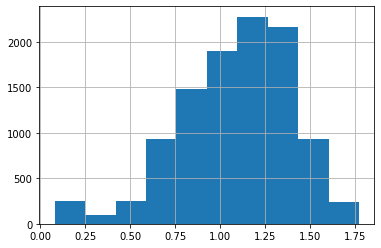

In [52]:
# Looking at historgrams for each of our features in the dataset

phd_df['LW Ratio'].hist()

<AxesSubplot:>

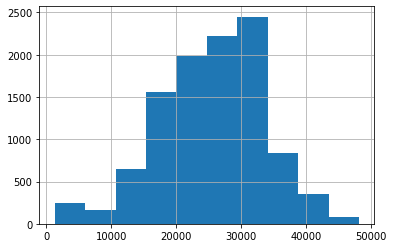

In [53]:
phd_df['overall_pay_clean'].hist()

<AxesSubplot:>

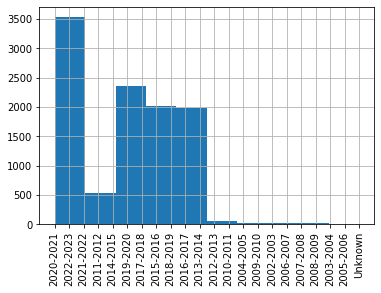

In [54]:
phd_df['Academic Year'].hist(xrot=90)

It looks like the default sorting of this graph causes the Academic Year's range to line up a little out of order with how these occurred over time. If we resort this to be sequential we would see that the self reported data is going up over time.

<AxesSubplot:>

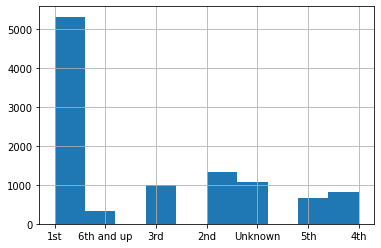

In [55]:
phd_df['Program Year'].hist()

It looks like we have the majority of respondents are 1st year PhD students. This could be that this is the most likely time for the respondents to be interacting with the self reporting around stipends, and when they care about what their stipend is getting them.

- **Examine the relationships within the dataset - using 2 different methods**

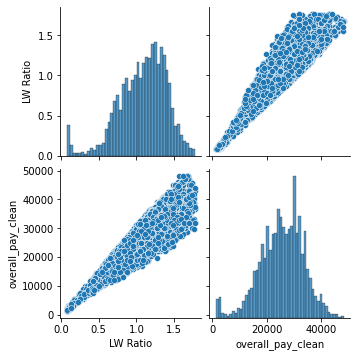

In [56]:
# We will start by looking at the pair plot two ways for our continuous data

sns.pairplot(phd_df)

In [69]:
phd_df.corr()

,LW Ratio,overall_pay_clean
LW Ratio,1.00000,0.91216
overall_pay_clean,0.91216,1.00000


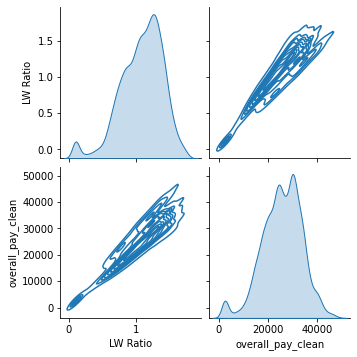

In [57]:
sns.pairplot(data=phd_df, kind='kde')

Now we will need to find a way to reduce the number of categories for our Universities and Departments to make some easier to digest findings. The first thought is to enrich by adding State so that we can extrapolate around which states have the best stipend and LW ratio.

***Enriching of our categorical data***
***

In [58]:
# How many Universities to we have to map to their State

len(phd_df['University'].value_counts())

290

In [59]:
phd_df['University'].value_counts().to_csv('universities.csv')

I went through the list of 290 universities and added the state that they are located in by removing the state from the names that had them, then looking the remaining up and filling them out by hand. Additionally region was added to the dataset for a smaller category to analyze. I saved them in a new csv called universities_state for us to merge into our phd_df.

In [60]:
enrich_df = pd.read_csv('universities_state.csv')

enrich_phd_df = pd.merge(phd_df, enrich_df, on='University')

enrich_phd_df

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,overall_pay_clean,State,Region
0,Johns Hopkins University (JHU),Pathobiology,"$34,000",1.32,2020-2021,1st,34000,Maryland,Southeast
1,Johns Hopkins University (JHU),ECE,"$28,958",1.13,2020-2021,2nd,28958,Maryland,Southeast
2,Johns Hopkins University (JHU),Public health,"$25,000",0.97,2022-2023,1st,25000,Maryland,Southeast
3,Johns Hopkins University (JHU),Unknown,"$36,000",1.40,2021-2022,5th,36000,Maryland,Southeast
4,Johns Hopkins University (JHU),philosophy,"$33,000",1.28,2022-2023,1st,33000,Maryland,Southeast
...,...,...,...,...,...,...,...,...,...
10528,SUNY Upstate Medical Center,Cell and Developmental Biology/College of Grad...,"$24,780",1.16,2016-2017,6th and up,24780,New York,Northeast
10529,Marshall University,Biomedical Sciences,"$24,455",1.27,2015-2016,1st,24455,West Virginia,Southeast
10530,Meharry Medical College,Biomedical Science,"$1,900",0.10,2014-2015,4th,1900,Tennessee,Southeast
10531,Meharry Medical College,Biomedical Science,"$2,400",0.10,2015-2016,5th,2400,Tennessee,Southeast


In [61]:
# During enrichment we found a "New School" for our analysis this is an unnecessary bucket so we will drop them.

enrich_phd_df[enrich_phd_df['State'] == 'Unknown']

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,overall_pay_clean,State,Region
10296,New School,Economics,"$20,000",0.67,2021-2022,1st,20000,Unknown,Unknown
10297,New School,Sociology,"$20,000",0.67,2016-2017,3rd,20000,Unknown,Unknown


In [62]:
enrich_phd_df = enrich_phd_df[enrich_phd_df['State'] != 'Unknown']
enrich_phd_df[enrich_phd_df['State'] == 'Unknown']

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,overall_pay_clean,State,Region


interval columns not set, guessing: ['overall_pay_clean', 'LW Ratio']


<AxesSubplot:>

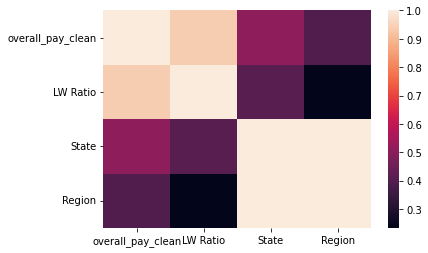

In [68]:
mini_df = enrich_phd_df[['overall_pay_clean', 'LW Ratio', 'State', 'Region']]
sns.heatmap(mini_df.phik_matrix())

- **Reduction of the dimensionality of the dataset**

In general we have been doing dimensionality reduction as we go by combining columns and removing them after we ensure that we have the data that we are wanting to do our analysis on. Further dimensionality reduction could take the form of single value decomposition, or PCA and we could try and construct an predictor for the overall pay, or LW ratio based on the categorical data available. I am not sure how we would do that yet, especially when using mixed data types as our inputs and outputs.

### Question 4:  Insights and Findings
---
- **Describe any insights and/or findings from within the dataset.**

In [84]:
mini_df = enrich_phd_df[['Region', 'State', 'LW Ratio', 'overall_pay_clean']]
group_phd_df = mini_df.groupby(['Region', 'State']).mean()
group_phd_df

LW Ratio  overall_pay_clean
Region    State                                      
Midwest   Illinois        1.133838       26523.030981
          Indiana         0.631250       12714.125000
          Iowa            1.066613       23144.016129
          Kansas          0.964219       19958.031250
          Michigan        1.177157       25775.020067
          Minnesota       1.054410       24036.534161
          Missouri        0.983860       19860.666667
          Nebraska        1.054364       21130.854545
          North Dakota    0.853571       16056.357143
          Ohio            1.041607       20491.791667
          South Dakota    0.995714       19312.428571
          Wisconsin       1.018957       22906.634783
Northeast Connecticut     1.300702       31889.625731
          Maine           0.920714       19758.500000
          Massachusetts   1.096728       30242.750831
          New Hampshire   1.091081       26724.000000
          New Jersey      1.163950       29721.135000
          New York        1.109719       28334.511002
          Pennsylvania    1.180086       26635.806313
          Rhode Island    1.323803       29959.422535
          Vermont         1.037500       26733.200000
Southeast Alabama         0.933232       19812.737374
          Arkansas        1.029412       20898.500000
          Delaware        0.993562       25093.561644
          Florida         0.978503       22445.328025
          Georgia         1.075769       24215.743590
          Kentucky        0.984477       20320.197674
          Louisiana       0.891327       19595.982301
          Maryland        0.993581       27273.520270
          Mississippi     0.871951       18549.634146
          North Carolina  1.120709       24201.665354
          South Carolina  0.925377       19899.037736
          Tennessee       1.085647       24185.797414
          Virginia        1.034302       23654.833962
          Washington DC   0.838761       25825.088496
          West Virginia   0.980000       21751.181818
Southwest Arizona         0.954063       20659.171875
          New Mexico      0.885455       17190.681818
          Oklahoma        0.869861       17241.888889
          Texas           1.106182       23892.280210
West      Alaska          1.102000       24827.600000
          California      1.140016       30332.741758
          Colorado        1.054530       24791.983425
          Hawaii          0.720000       21862.000000
          Idaho           1.046455       21801.700288
          Montana         0.914286       19292.357143
          Nevada          0.933636       20055.045455
          Oregon          1.003663       21617.584158
          Utah            1.069901       23347.960396
          Washington      1.232944       26580.298387
          Wyoming         0.798571       16255.571429

In [90]:
mini_df[mini_df['Region'] == 'Northeast'].groupby(['State']).mean().sort_values('LW Ratio', ascending=False)

,LW Ratio,overall_pay_clean
State,,
Rhode Island,1.323803,29959.422535
Connecticut,1.300702,31889.625731
Pennsylvania,1.180086,26635.806313
New Jersey,1.163950,29721.135000
New York,1.109719,28334.511002
Massachusetts,1.096728,30242.750831
New Hampshire,1.091081,26724.000000
Vermont,1.037500,26733.200000
Maine,0.920714,19758.500000


In [96]:
mini_df[mini_df['Region'] == 'Northeast'].groupby(['State']).count()['Region']

State
Connecticut      171
Maine             14
Massachusetts    602
New Hampshire     37
New Jersey       200
New York         818
Pennsylvania     697
Rhode Island      71
Vermont           20
Name: Region, dtype: int64

For the northeast region of the United States the best LW ratio is for Rhode Island. We also do not have a lot of entries from Maine or Vermont and would want to see if that is proportionaly acceptable for our analysis. I am not going to bring it up every time, but I am going to calculate the counts and we could do furhter analysis on population, number of universities, number of doctoral students, etc.

In [91]:
mini_df[mini_df['Region'] == 'Southeast'].groupby(['State']).mean().sort_values('LW Ratio', ascending=False)

,LW Ratio,overall_pay_clean
State,,
North Carolina,1.120709,24201.665354
Tennessee,1.085647,24185.797414
Georgia,1.075769,24215.743590
Virginia,1.034302,23654.833962
Arkansas,1.029412,20898.500000
Maryland,0.993581,27273.520270
Delaware,0.993562,25093.561644
Kentucky,0.984477,20320.197674
West Virginia,0.980000,21751.181818


In [97]:
mini_df[mini_df['Region'] == 'Southeast'].groupby(['State']).count()['Region']

State
Alabama            99
Arkansas           34
Delaware           73
Florida           314
Georgia           390
Kentucky          172
Louisiana         113
Maryland          296
Mississippi        41
North Carolina    508
South Carolina    106
Tennessee         232
Virginia          265
Washington DC     113
West Virginia      33
Name: Region, dtype: int64

The best state in the Southeast region for LW ratio is North Carolina with the worst being Washington D.C.

In [92]:
mini_df[mini_df['Region'] == 'Midwest'].groupby(['State']).mean().sort_values('LW Ratio', ascending=False)

,LW Ratio,overall_pay_clean
State,,
Michigan,1.177157,25775.020067
Illinois,1.133838,26523.030981
Iowa,1.066613,23144.016129
Minnesota,1.054410,24036.534161
Nebraska,1.054364,21130.854545
Ohio,1.041607,20491.791667
Wisconsin,1.018957,22906.634783
South Dakota,0.995714,19312.428571
Missouri,0.983860,19860.666667


In [98]:
mini_df[mini_df['Region'] == 'Midwest'].groupby(['State']).count()['Region']

State
Illinois        581
Indiana           8
Iowa             62
Kansas           64
Michigan        299
Minnesota       161
Missouri         57
Nebraska         55
North Dakota     14
Ohio            336
South Dakota      7
Wisconsin       230
Name: Region, dtype: int64

The best state in the Midwest region for LW ratio is Michigan with the worst being Indiana.

In [93]:
mini_df[mini_df['Region'] == 'Southwest'].groupby(['State']).mean().sort_values('LW Ratio', ascending=False)

,LW Ratio,overall_pay_clean
State,,
Texas,1.106182,23892.280210
Arizona,0.954063,20659.171875
New Mexico,0.885455,17190.681818
Oklahoma,0.869861,17241.888889


In [99]:
mini_df[mini_df['Region'] == 'Southwest'].groupby(['State']).count()['Region']

State
Arizona       192
New Mexico     22
Oklahoma       72
Texas         571
Name: Region, dtype: int64

The best state in the Southwest region for LW ratio is Texas with the worst being Oklahoma.

In [94]:
mini_df[mini_df['Region'] == 'West'].groupby(['State']).mean().sort_values('LW Ratio', ascending=False)

,LW Ratio,overall_pay_clean
State,,
Washington,1.232944,26580.298387
California,1.140016,30332.741758
Alaska,1.102000,24827.600000
Utah,1.069901,23347.960396
Colorado,1.054530,24791.983425
Idaho,1.046455,21801.700288
Oregon,1.003663,21617.584158
Nevada,0.933636,20055.045455
Montana,0.914286,19292.357143


In [100]:
mini_df[mini_df['Region'] == 'West'].groupby(['State']).count()['Region']

State
Alaska           5
California    1274
Colorado       181
Hawaii          38
Idaho          347
Montana         28
Nevada          44
Oregon         101
Utah           101
Washington     248
Wyoming         14
Name: Region, dtype: int64

The best state in the West region for LW ratio is Washington with the worst being Hawai'i.

In [101]:
mini_df.groupby(['State']).mean().sort_values('LW Ratio', ascending=False).head(5)

,LW Ratio,overall_pay_clean
State,,
Rhode Island,1.323803,29959.422535
Connecticut,1.300702,31889.625731
Washington,1.232944,26580.298387
Pennsylvania,1.180086,26635.806313
Michigan,1.177157,25775.020067


In [107]:
mini_df.groupby(['State']).mean().sort_values('overall_pay_clean', ascending=False).head(5)

,LW Ratio,overall_pay_clean
State,,
Connecticut,1.300702,31889.625731
California,1.140016,30332.741758
Massachusetts,1.096728,30242.750831
Rhode Island,1.323803,29959.422535
New Jersey,1.163950,29721.135000


In [105]:
mini_df.groupby(['Region']).mean().sort_values('LW Ratio', ascending=False).head(3)

,LW Ratio,overall_pay_clean
Region,,
Northeast,1.145897,28621.089734
West,1.105544,27062.144477
Midwest,1.083623,23803.868196


Our overall values show that Rhode Island has the best LW ratio for its schools, and the region with the best average LW ratio is the Northeast.

In [103]:
mini_df.groupby(['State']).mean().sort_values('LW Ratio', ascending=True).head(5)

,LW Ratio,overall_pay_clean
State,,
Indiana,0.631250,12714.125000
Hawaii,0.720000,21862.000000
Wyoming,0.798571,16255.571429
Washington DC,0.838761,25825.088496
North Dakota,0.853571,16056.357143


In [106]:
mini_df.groupby(['Region']).mean().sort_values('LW Ratio', ascending=True).head(3)

,LW Ratio,overall_pay_clean
Region,,
Southeast,1.020835,23470.109000
Southwest,1.046581,22437.180863
Midwest,1.083623,23803.868196


Our overall values show that Indiana has the worst LW ratio for its schools and the region with the worst average LW ratio is the Southeast.

## V. Conclusion

The dataset that we did our EDA on shows that on average across the United States the stipend that PhD students receive is right around the living wage for the area (LW Ratio of 1). There are however parts of the U.S. that provide better stipends to their doctoral students when compared to others. In the analysis that we did on this weeks dataset we found that the best region in the U.S. for providing a good LW Ratio is the Northeast (1.146), with Rhode Island having the highest mean LW Ratio for its students at 1.324. The inverse being that the Southeast region having the worst mean LW Ratio (1.021), with the worst state being Indiana with a mean LW Ratio of 0.631. That being said the majority of these stipends end up between 22k and 32k yearly compensation.

The interesting parts of working with this weeks dataset were the large number of missing values in the dataset, the self reported nature of the datasets values, the need for enrichment data to reduce dimensionality of categorical variables, and the kurtosis of the final dataframe on overall pay when cleaned. 

## VI. References

MSDS 650 - Week 3 Content:

1.) Dataset available from Kaggle: __[PhD Stipends, Salaries, and LW Ratios](https://www.kaggle.com/datasets/paultimothymooney/phd-stipends)__

2.) __[From the Experts: Exploratory Data Analysis and Experimental Design](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152273/View)__

3.) __[Week 3 Assignment](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152267/View)__
 